In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca file CSV
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

# Tampilkan 5 baris pertama dari dataframe
df.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
df.info() # melihat info data awal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

drop kolom yg isinya semua missing value > drop missing value diatas 40% > imputasi missing value dibawah 40%

In [5]:
# drop semua kolom yg full dengan null
to_drop = df.isnull().sum().sort_values() # Menghitung jumlah nilai NaN di setiap kolom dan mengurutkannya
to_drop = to_drop[to_drop == df.shape[0]] # Memilih kolom-kolom yang seluruhnya berisi nilai NaN
to_drop = list(to_drop.index) # Mengubah indeks dari Series menjadi list yang berisi nama-nama kolom yang seluruhnya berisi nilai NaN

#check dimensi dataset
print('dimensi dataset sebelum drop = ',df.shape)

#drop feature yang semua isinya nilai null
df.drop(columns=to_drop,inplace=True) 

#check dimensi dataset
print('dimensi dataset setelah drop = ',df.shape)

dimensi dataset sebelum drop =  (466285, 75)
dimensi dataset setelah drop =  (466285, 58)


In [6]:
#check persentase missing values untuk setiap feature
# Menghitung jumlah nilai NaN di setiap kolom, mengurutkannya secara menurun, dan mereset indeks
mv = df.isnull().sum().sort_values(ascending=False).reset_index() 
mv.columns = ['feature','null'] # Mengganti nama kolom
mv['%'] = round(mv['null']*100/(df.shape[0]),3) # Menghitung persentase nilai NaN di setiap kolom dan menyimpannya dalam kolom '%'
mv = mv[mv['%']>0] # Memilih hanya baris-baris yang memiliki persentase nilai NaN lebih dari 0%
mv

,feature,null,%
0,mths_since_last_record,403647,86.567
1,mths_since_last_major_derog,367311,78.774
2,desc,340304,72.982
3,mths_since_last_delinq,250351,53.691
4,next_pymnt_d,227214,48.729
5,tot_cur_bal,70276,15.071
6,tot_coll_amt,70276,15.071
7,total_rev_hi_lim,70276,15.071
8,emp_title,27588,5.917
9,emp_length,21008,4.505


In [7]:
#filter feature yang punya null values > 40%
mv1 = list(mv['feature'][mv['%']>40])
print(mv1)
#filter feature yang null values < 40%
mv2 = list(mv['feature'][mv['%']<40])
print(mv2)

['mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq', 'next_pymnt_d']
['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim', 'emp_title', 'emp_length', 'last_pymnt_d', 'revol_util', 'collections_12_mths_ex_med', 'last_credit_pull_d', 'pub_rec', 'inq_last_6mths', 'delinq_2yrs', 'open_acc', 'earliest_cr_line', 'acc_now_delinq', 'total_acc', 'title', 'annual_inc']


In [8]:
# drop feature yang punya null values >40%
df.drop(columns=mv1,inplace=True)

In [9]:
#membagi data numerik dan kategori
numerik = []
categories = []
for i in mv2:
  if (df[i].dtype == 'object') or (df[i].dtype =='category'):
    categories.append(i)
  else:
    numerik.append(i)

### cleaning data numerik

In [10]:
#imputation
# melakukan imputasi ke feature numerik dengan median karena distribusi data lebuh banyak skewed dan mempunyai outlier
for i in numerik:
  df[i].fillna(df[i].median(),inplace=True)

### cleaning data kategorik

In [11]:
kategori_cols = df.select_dtypes(include=['object', 'category']).columns

In [12]:
#membuat tabel kategori dan melihat yang mana saya memiliki nilai uniq yg banyak dan akan dihapus
df[kategori_cols].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [13]:
#melihat isi kolom
for i in kategori_cols:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
term
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64
--------------------------------------------------
grade
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
--------------------------------------------------
sub_grade
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
--------------------------------------------------
emp_title
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse          

In [14]:
#mengganti none dan any di kolom home ownership
df['home_ownership'] = df['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})

In [15]:
# Membuat kolom 'target' pada DataFrame 'df' dengan nilai 'good' atau 'bad'
df['status'] = np.where(
    (df['loan_status'] == 'Charged Off') |  # Jika status pinjaman adalah 'Charged Off'
    (df['loan_status'] == 'Default') |      # atau status pinjaman adalah 'Default'
    (df['loan_status'] == 'Late (31-120 days)') |  # atau status pinjaman adalah 'Late (31-120 days)'
    (df['loan_status'] == 'Late (16-30 days)') |   # atau status pinjaman adalah 'Late (16-30 days)'
    (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'),  # atau status pinjaman adalah 'Does not meet the credit policy. Status:Charged Off'
    'bad',  # Maka nilai 'target' adalah 'bad'
    'good'  # Selain itu, nilai 'target' adalah 'good'
)

In [16]:
#drop kolom yang memiliki nilai uniq banyak,yg cuma memiliki 1,grade dan sub grade sama jadi pilih grade,loan status sudah diganti dengan feature target
df.drop(columns=['Unnamed: 0','emp_title','url','title','zip_code','addr_state','sub_grade','loan_status','application_type'],inplace=True)

In [17]:
cleaned_cat = df.select_dtypes(include=['object', 'category']).columns

In [18]:
#melihat kolom categories yang sudah dibersihkan
df[cleaned_cat].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,4,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
earliest_cr_line,466256,664,Oct-00,3674
initial_list_status,466285,2,f,303005


In [19]:
#mengisi missing value dengan nilai modus
df['emp_length'] = df['emp_length'].fillna('10+ years')
df['last_pymnt_d'] = df['last_pymnt_d'].fillna('Jan-16')
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna('Jan-16')
df['earliest_cr_line'] = df['earliest_cr_line'].fillna('Oct-00')

mengganti data tipe tanggal

In [20]:
from datetime import datetime as dt
df['issue_d'] = pd.to_datetime(df['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y')))
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'].apply(lambda x: dt.strptime(x, '%b-%y')))
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'].apply(lambda x: dt.strptime(x, '%b-%y')))
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'].apply(lambda x: dt.strptime(x, '%b-%y')))

In [21]:
# mengganti tanggal tahun yang salah ketika perubahan ke tipe datetime pada kolom earliest cr line
def correct_year(date):
    if date.year > 2011:  # misalnya, jika tahun lebih besar dari 2011 dianggap tidak sesuai
        # tahun yang lebih dari 2011 akan dikurangi 100 karena pada analisis sebelumnya tahunnya ada yang 2044,2045,dst
        return date.replace(year=date.year - 100) 
    return date

# Terapkan fungsi untuk memperbaiki tahun yang tidak sesuai
df['earliest_cr_line'] = df['earliest_cr_line'].apply(correct_year)


In [22]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          466285 non-null  int64         
 1   member_id                   466285 non-null  int64         
 2   loan_amnt                   466285 non-null  int64         
 3   funded_amnt                 466285 non-null  int64         
 4   funded_amnt_inv             466285 non-null  float64       
 5   term                        466285 non-null  object        
 6   int_rate                    466285 non-null  float64       
 7   installment                 466285 non-null  float64       
 8   grade                       466285 non-null  object        
 9   emp_length                  466285 non-null  object        
 10  home_ownership              466285 non-null  object        
 11  annual_inc                  466285 non-

# Exploratory Data Analysis

## univariate analysis

### categorical

In [24]:
categories = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category']

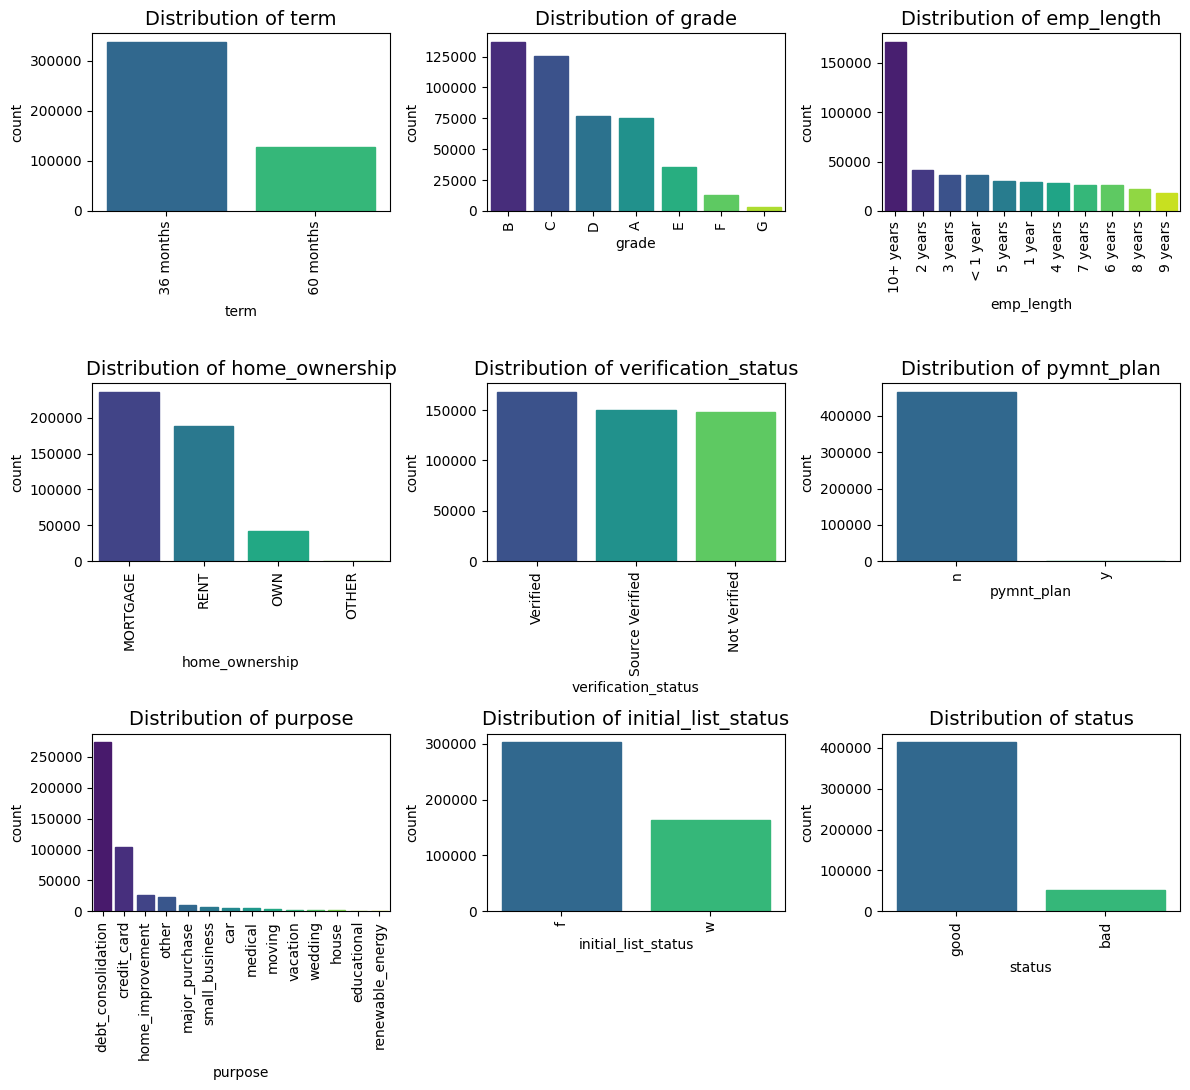

In [25]:
plt.figure(figsize=(12, 11))
for i in range(min(len(categories), 9)):
    plt.subplot(3, 3, i + 1)
    # Urutkan nilai dari tertinggi ke terendah
    sorted_values = df[categories[i]].value_counts().index # Select the i-th category
    # Buat palet warna
    palette = sns.color_palette("viridis", len(sorted_values))
    # Buat countplot tanpa menggunakan hue
    sns.countplot(data=df, x=categories[i], order=sorted_values) # Plot the i-th category
    # Tetapkan warna secara manual
    for bar, color in zip(plt.gca().patches, palette): # Get the current axes
        bar.set_color(color)
    plt.title(f'Distribution of {categories[i]}', fontsize=14) # Set title for the i-th category
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- pada kolom term jangka waktu cicilannya didominasi oleh 36 month
- pada kolom grade didominasi oleh b dan c
- pada kolom emp length didominasi oleh peminjam yang sudah lama bekerja lebih dari 10 tahun
- pada kolom home ownership didominasi oleh mortage
- pada kolom verification status didominasi oleh verified
- pada kolom payment plant didominasi oleh label n
- pada kolom distribution of purpose didominasi oleh debt consolidation
- pada kolom initial list status ddominasi oleh lbel f
- pada kolom status yaitu yang akan dijadikan target didominasi oleh good

### numerical

In [26]:
numerics = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']

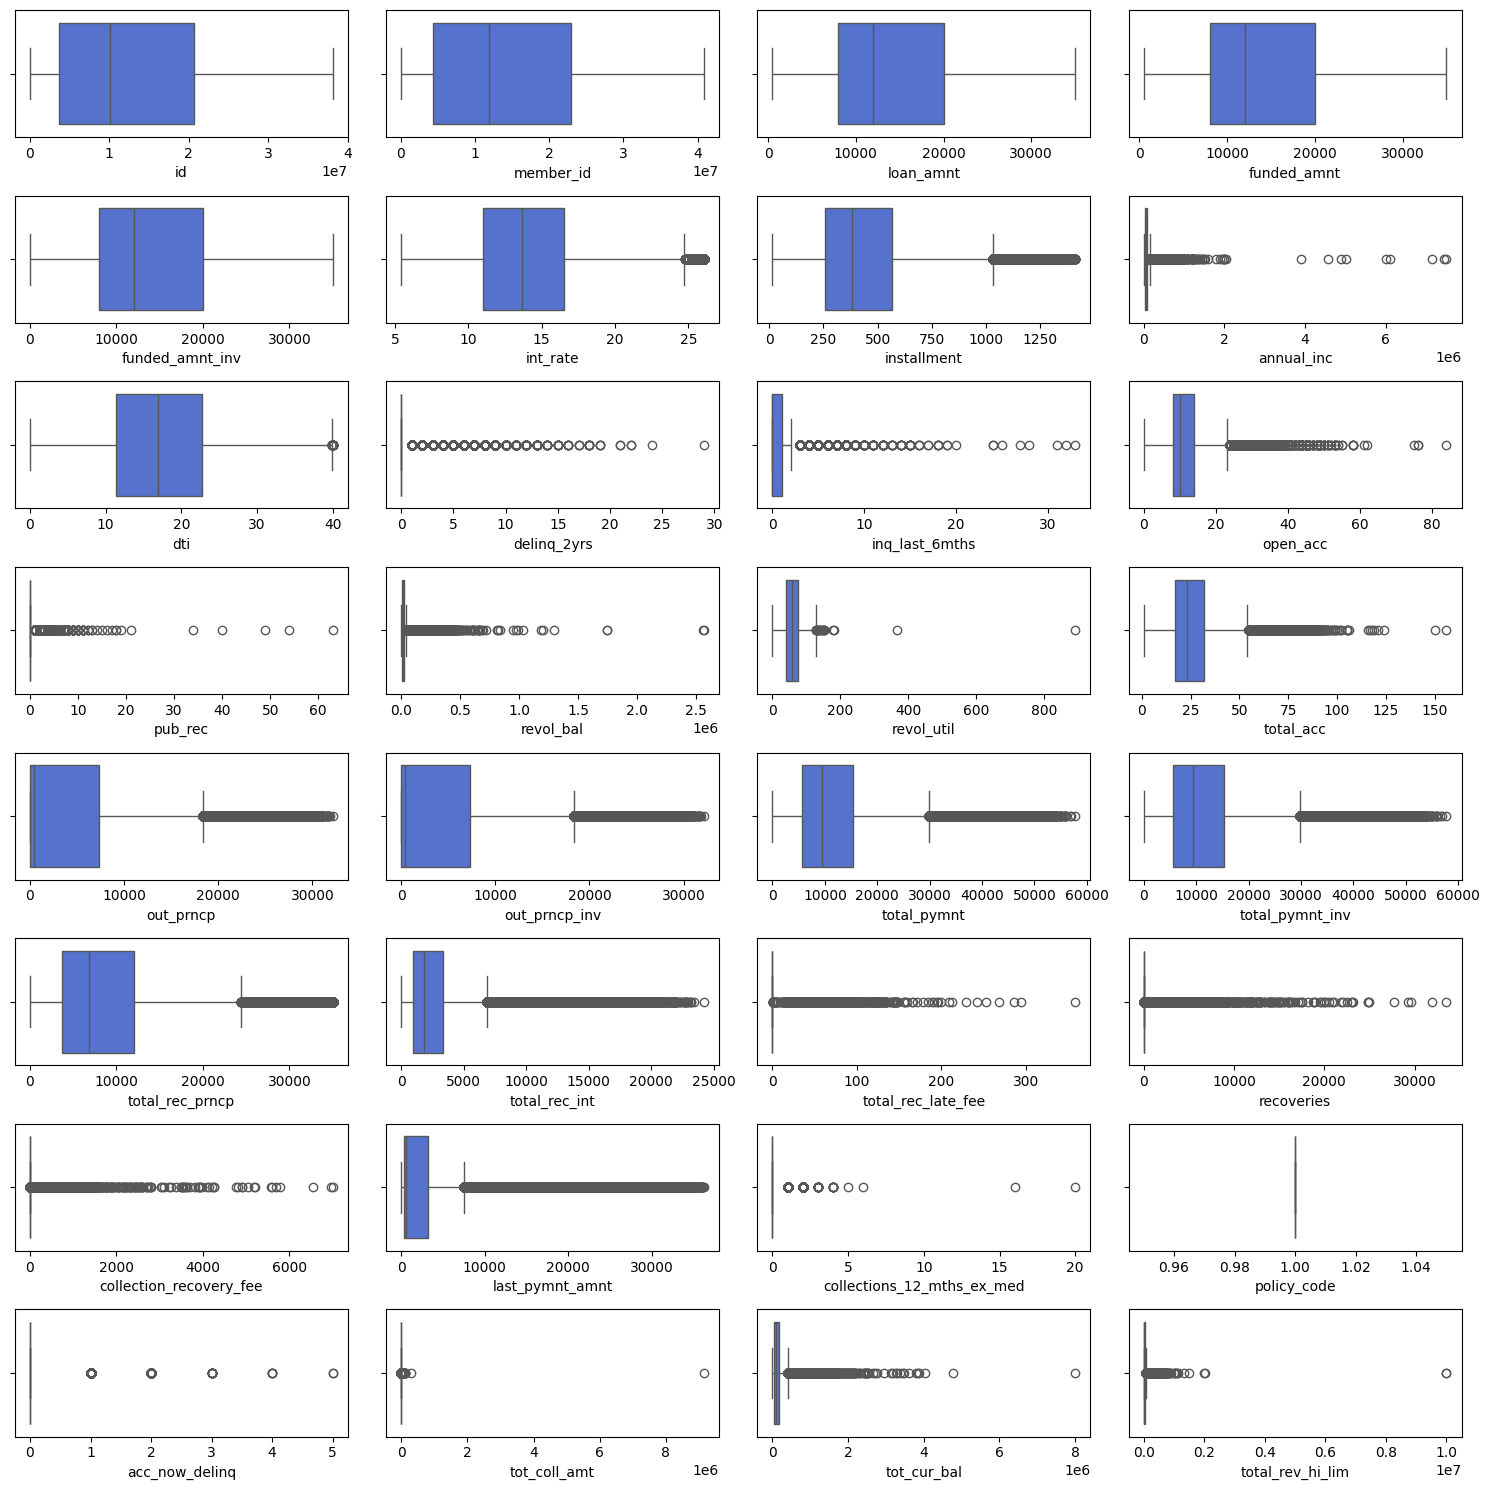

In [27]:
plt.figure(figsize=(15,15))
for i in range(0, len(numerics)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[numerics[i]], color='royalblue')
    plt.xlabel(numerics[i])
    plt.tight_layout()

- dilihat dari data numerik kebanyakan distribusinya adalah skewed kanan dengan outlier 

### DateTime

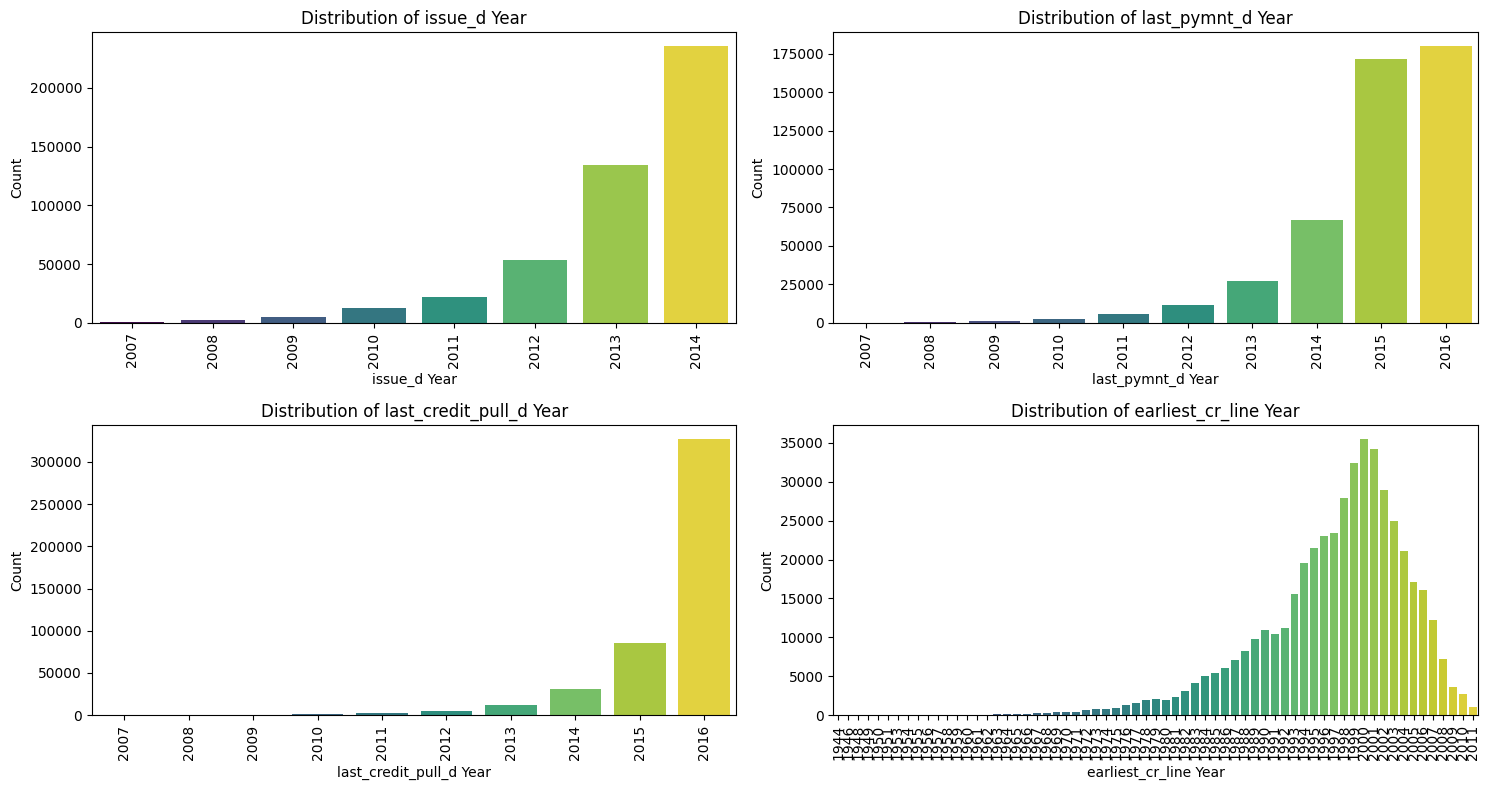

In [28]:
dmy = ['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']
for col in dmy:
    df[col] = pd.to_datetime(df[col])
    df[col+'_year'] = df[col].dt.year

plt.figure(figsize=(15, 8))
for i, col in enumerate(dmy):
    if col + '_year' in df.columns:
        plt.subplot(2, 2, i + 1)
        sns.countplot(x=df[col + '_year'], hue=df[col + '_year'], palette='viridis', legend=False)
        plt.xlabel(col + ' Year')
        plt.ylabel('Count')
        plt.title('Distribution of ' + col + ' Year')
        plt.xticks(rotation=90)
        plt.tight_layout()

plt.show()

- data pada tipe datetime menunjukkan bahwa setiap tahun mengalami peningkatan jumlah

## Bivariate analysis

### categorical

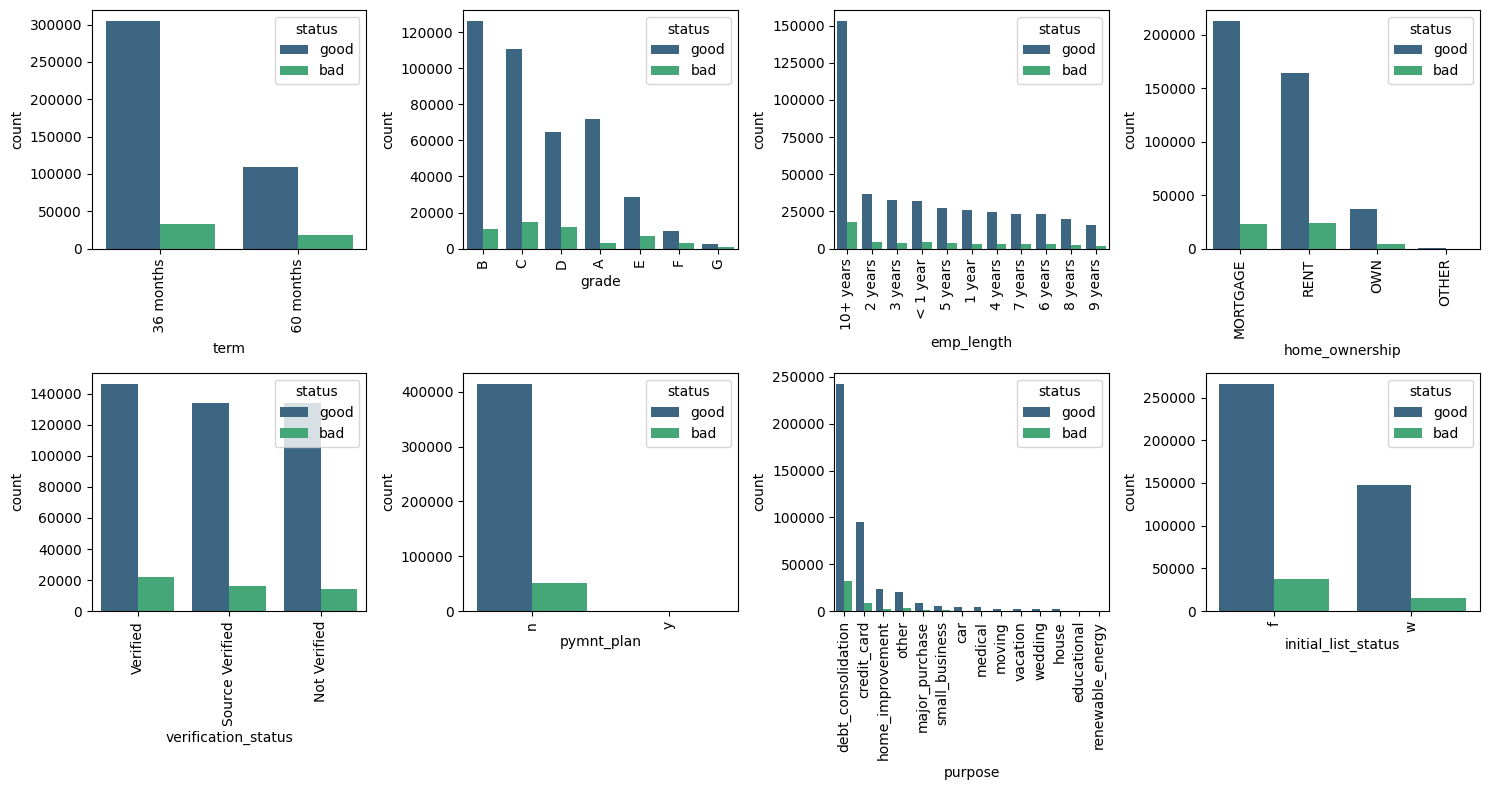

In [29]:
plt.figure(figsize=(15, 8))
for i in range(min(len(categories), 8)):  # Batas maksimal subplot yang akan ditampilkan adalah 8
    plt.subplot(2, 4, i + 1)
    sorted_values = df[categories[i]].value_counts().index
    sns.countplot(data=df, x=categories[i], hue='status', order=sorted_values, palette="viridis")
    plt.xlabel(categories[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

- dilihat dari data diatas bahwa peminjam yang bad kebanyakan meminjam dengan jangka waktu 36 bulan, berada pada grade c, rumah mereka masih menyewa dan juga tujuan mereka meminjam adalah untuk debt consolidation 
- kalau dilihat dari yang good debitur kebanyakan mereka meminjam dengan jangka waktu 36 bulan kemudian status mereka ada pada  grade b, mempunyai rumah yg statusnya mortage dan mereka juga bekerja lebih dari 10 tahun kemudian tujuan mereka hutang adalah untuk debt consolidation yang didanai secara fractional

### numerical

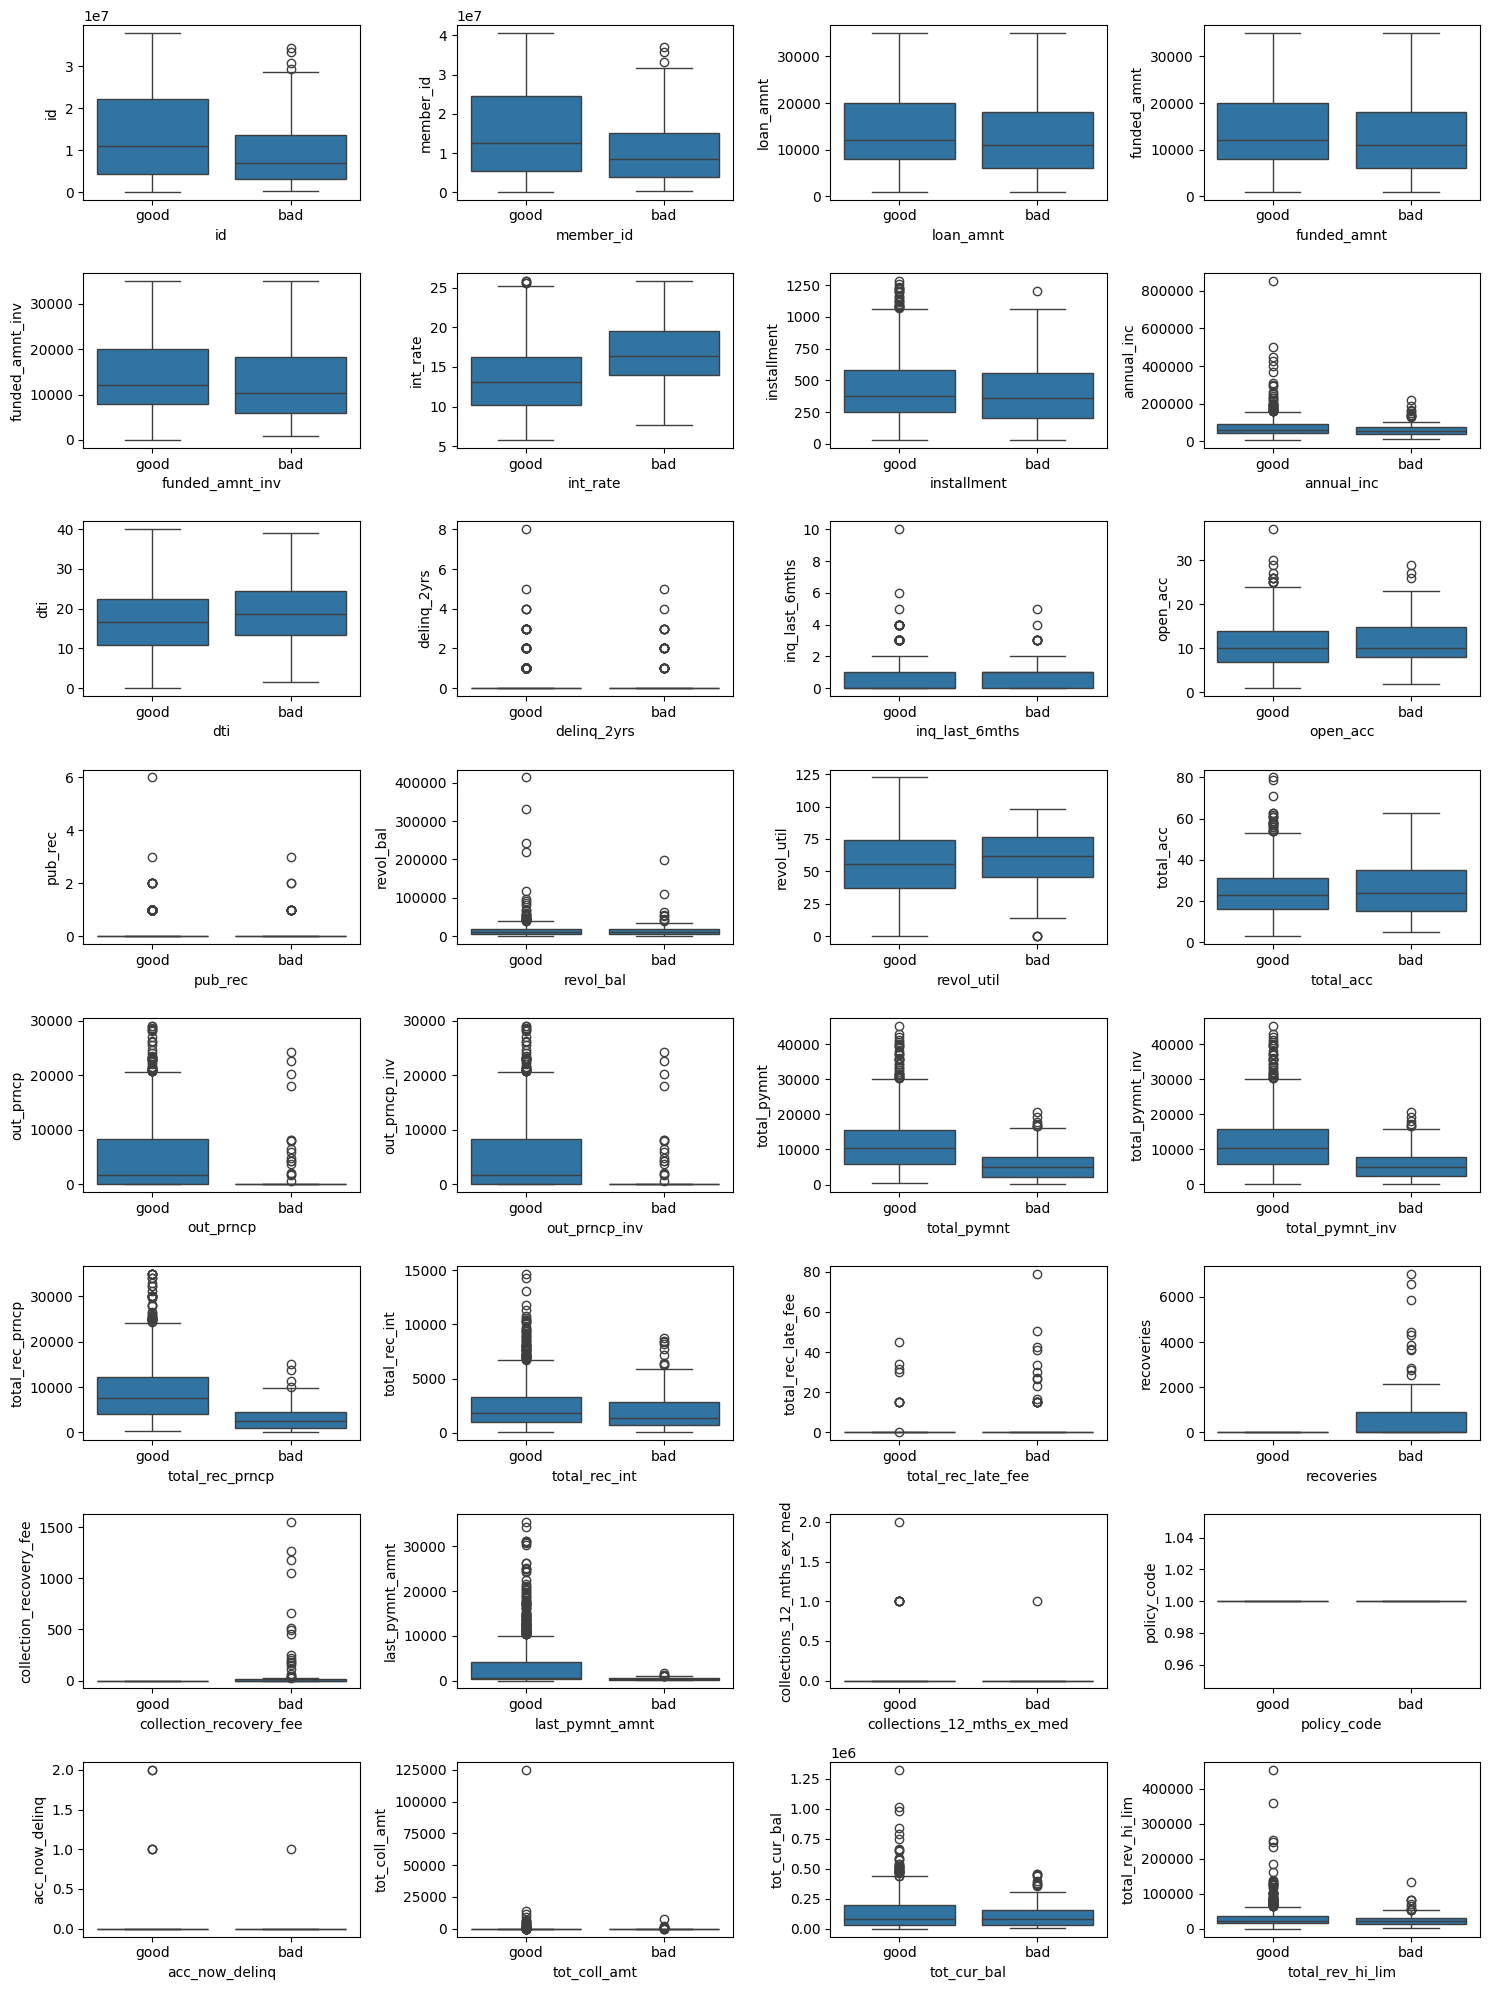

In [30]:
df_sample=df.sample(1000,random_state=1)
plt.figure(figsize=(15,20))
for i in range(0, len(numerics)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=df_sample[numerics[i]], x=df['status'])
    plt.xlabel(numerics[i])
    plt.tight_layout()

- berdasarkan data diatas dapat dilihat bahwa peminjam yang gagal bayar atau bad memiliki int rate(suku bunga) yang tinggi,total rec late fee yang tinggi, recoveries yang tinggi dan dari semua data diatas distribusi data terhadap fitur target adalah skewness kekanan

### datetime

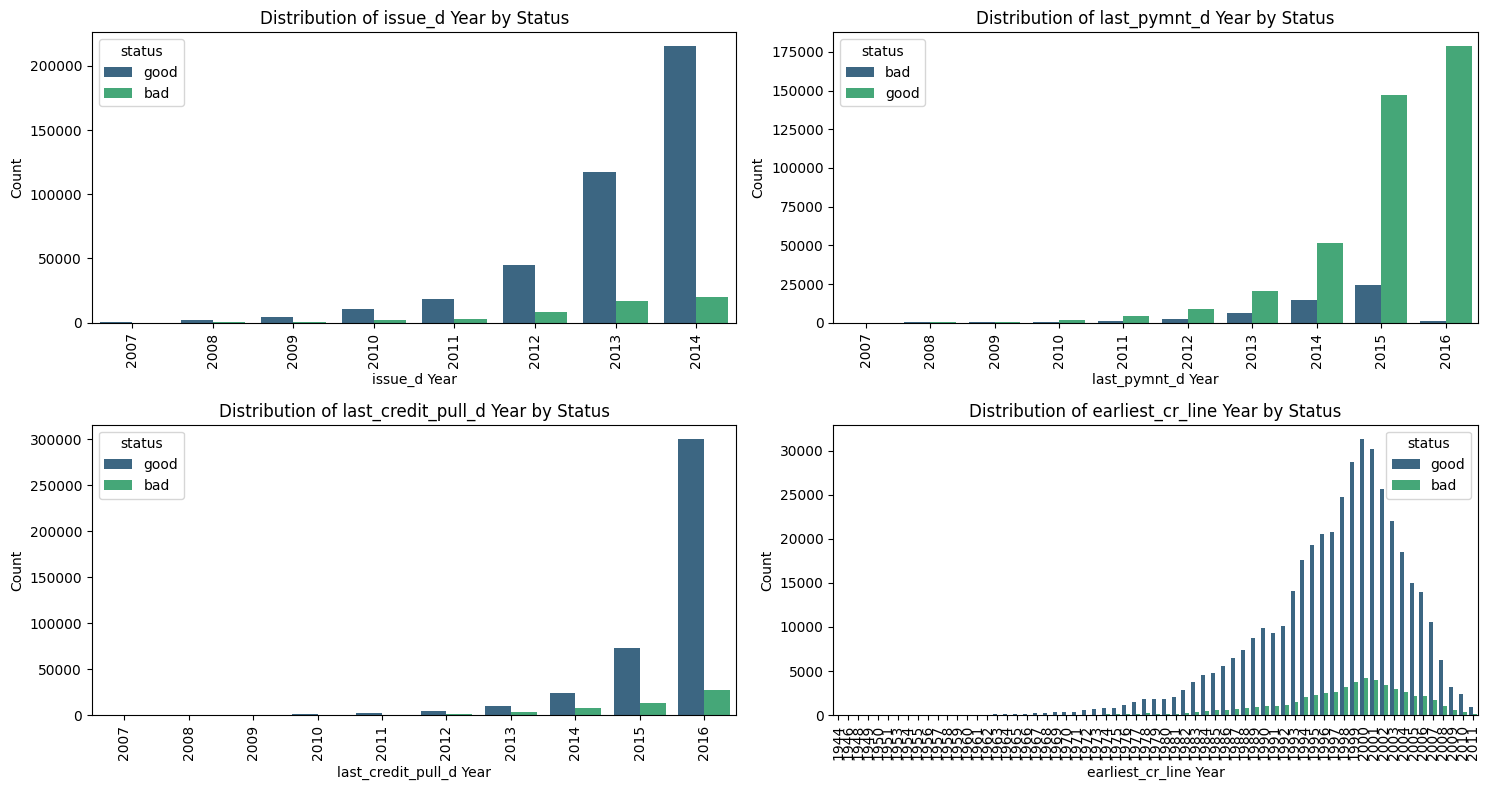

In [31]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(dmy):
    if col + '_year' in df.columns:
        plt.subplot(2, 2, i + 1)
        sns.countplot(x=df[col + '_year'], hue='status', data=df, palette='viridis')
        plt.xlabel(col + ' Year')
        plt.ylabel('Count')
        plt.title(f'Distribution of {col} Year by Status')
        plt.xticks(rotation=90)
        plt.tight_layout()

plt.show()

- terjadi peningkatan dari segi peminjam yang gagal bayar dan juga yang berhasil bayar pada setiap tahunnya dan puncaknya yaitu pada tahun 2000 kalau dilihat pada kolom earliest cr line

## Multivariate analysis

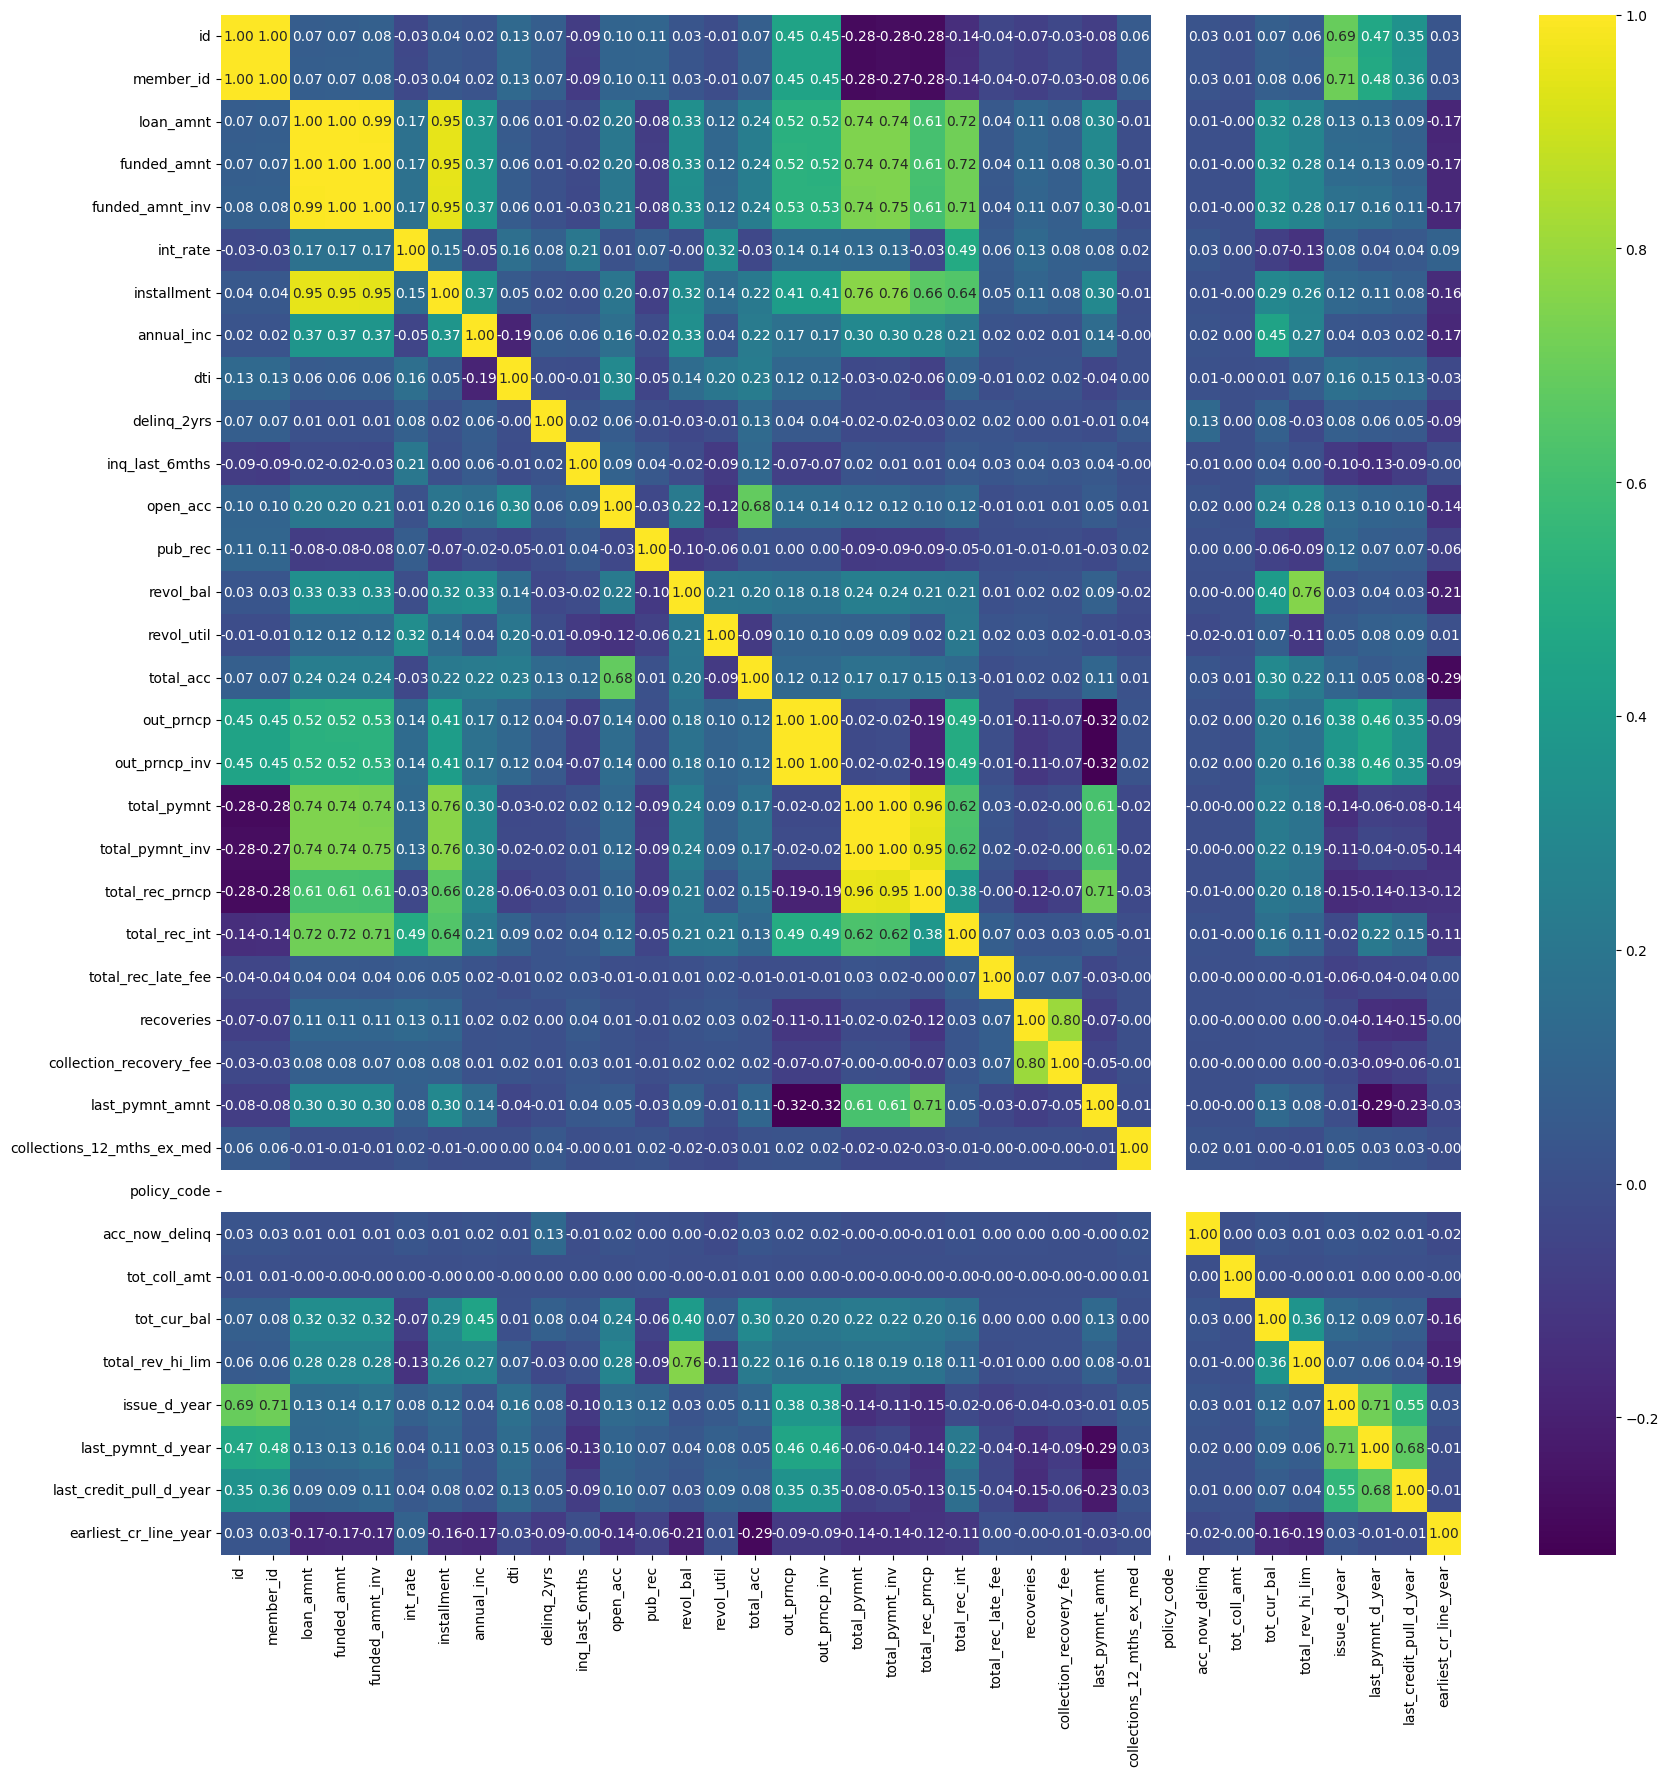

In [32]:
numeric_df = df.select_dtypes(include=[float, int])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Buat peta panas
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.show()

In [33]:
# menghapus kolom yang tidak digunakan pada pembuatan model dan juga menghapus kolom yang tidak 
# mempunyai korelasi dan menghapus kolom year karena sudah ada kolom date 
df.drop(columns=['id','member_id','collections_12_mths_ex_med','policy_code','acc_now_delinq','tot_coll_amt','pymnt_plan','issue_d_year'
,'last_pymnt_d_year','last_credit_pull_d_year','earliest_cr_line_year'],inplace=True)

In [34]:
dmy = ['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']
numerics = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
categories = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category']

In [35]:
print(dmy)

['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']


In [36]:
print(numerics)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim']


In [37]:
print(categories)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'status']


## insight

In [34]:
df_counts = df['status'].value_counts()
df_percentages = df['status'].value_counts(normalize=True) * 100

an = pd.DataFrame({'status': df_counts.index,'total': df_counts.values,'persen': df_percentages.values
})

# Atur ulang indeks untuk urutan yang lebih baik
an = an.reset_index(drop=True)

an

,status,total,persen
0,good,414099,88.808132
1,bad,52186,11.191868


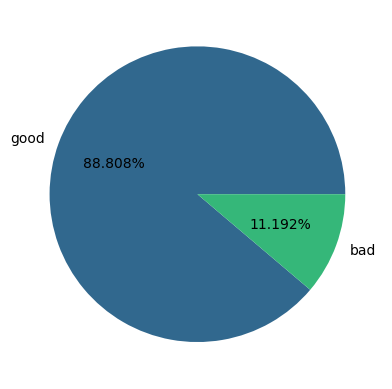

In [35]:
palette = sns.color_palette("viridis", len(an))

# Buat pie chart dengan warna viridis
plt.pie(an['total'], labels=an['status'], autopct='%.3f%%', colors=palette)
plt.show()

In [36]:
df.groupby('status').agg({'funded_amnt':'sum','total_pymnt':'sum'}).reset_index()

,status,funded_amnt,total_pymnt
0,bad,760916150,3.665645e+08
1,good,5903136300,5.014684e+09


Perusahaan loss sebesar $760,916,150 karena 11.192% peminjam tidak mampu bayar

In [37]:
re = df.groupby(['status','grade','purpose']).agg({'recoveries':'mean'}).reset_index().sort_values(['recoveries'],ascending=False)
re.columns = ['status','grade','purpose','avg_recoveries']
re[re['status']=='bad']
     

,status,grade,purpose,avg_recoveries
94,bad,G,renewable_energy,3941.606667
83,bad,F,wedding,2391.235238
88,bad,G,home_improvement,2240.982449
90,bad,G,major_purchase,1860.398889
97,bad,G,wedding,1830.858571
...,...,...,...,...
17,bad,B,educational,188.631429
7,bad,A,medical,178.483333
8,bad,A,moving,174.144000
87,bad,G,educational,81.070000


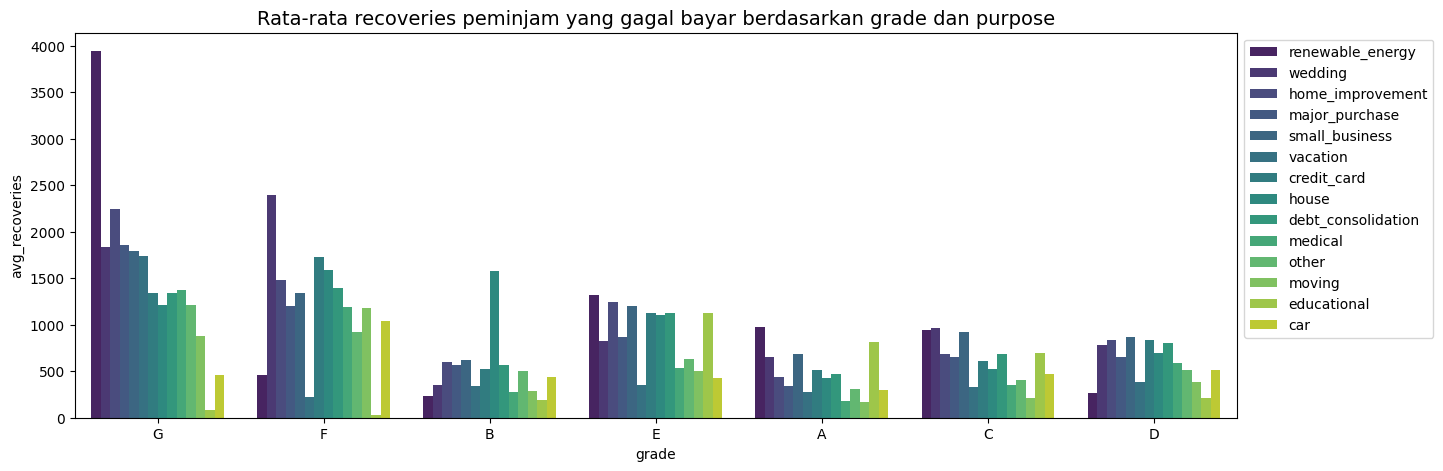

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade',y='avg_recoveries',hue='purpose',data=re[re['status']=='bad'],palette='viridis')
plt.title('Rata-rata recoveries peminjam yang gagal bayar berdasarkan grade dan purpose',fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Jika peminjam yang gagal bayar ditinjau dari feature grade, purpose, dan rata-rata nilai recoveries, maka peminjam yang berada pada kategori grade G dengan tujuan untuk energi terbarukan perlu dipertimbangkan untuk ditolak pengajuan kreditnya karena memiliki risiko kredit gagal bayar. begitu pula dengan peminjam yang berada pada kategori grade F dengan tujuan peminjaman wedding juga perlu dipertimbangkan untuk ditolak pengajuan kreditnya karena mimiliki risiko gagal bayar. Begitu pula pada grade B dengan tujuan peminjaman house memiliki resiko kredit gagal bayar sehingga dapat dipertimbangkan untuk menolak pengajuan kreditnnya.

In [39]:
df.shape

(466285, 38)

# data preparation tanpa balacing data target

In [40]:
from pycaret.classification import setup

clf1 = setup(data=df,
             target='status',
             fix_imbalance=False,
             train_size=0.8,
             numeric_imputation='median')

,Description,Value
0,Session id,2927
1,Target,status
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(466285, 38)"
5,Transformed data shape,"(466285, 80)"
6,Transformed train set shape,"(373028, 80)"
7,Transformed test set shape,"(93257, 80)"
8,Numeric features,26
9,Date features,4


# Modeling 1

In [41]:
from pycaret.classification import compare_models

# Melatih dan membandingkan beberapa model klasifikasi
best_model = compare_models(['lr','dt','rf','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9935,0.9958,0.9935,0.9936,0.9935,0.9668,0.9672,33.4520
rf,Random Forest Classifier,0.9928,0.9940,0.9928,0.9928,0.9927,0.9628,0.9634,196.6080
dt,Decision Tree Classifier,0.9862,0.9676,0.9862,0.9863,0.9863,0.9310,0.9311,42.4250
lr,Logistic Regression,0.9790,0.9652,0.9790,0.9794,0.9780,0.8848,0.8905,111.6120


# Evaluation 1

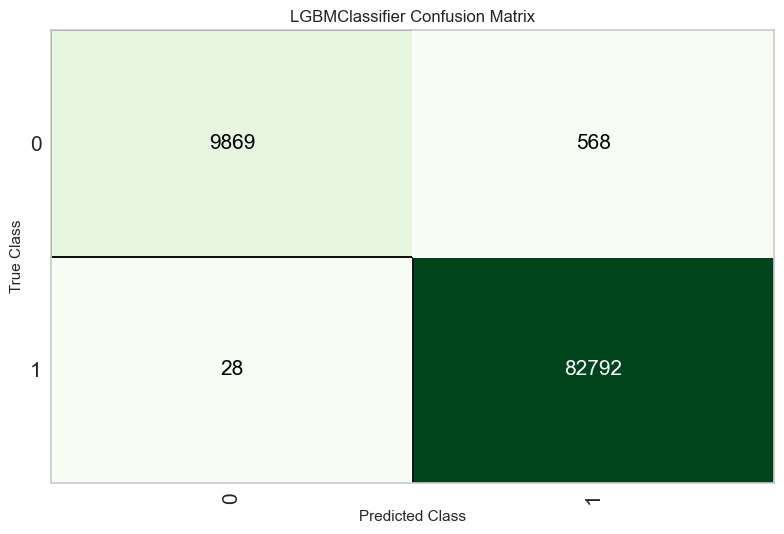

In [42]:
from pycaret.classification import plot_model
# melakukan evaluasi terhadap model yang terbaik
# Plot confusion matrix
plot_model(best_model, plot='confusion_matrix')

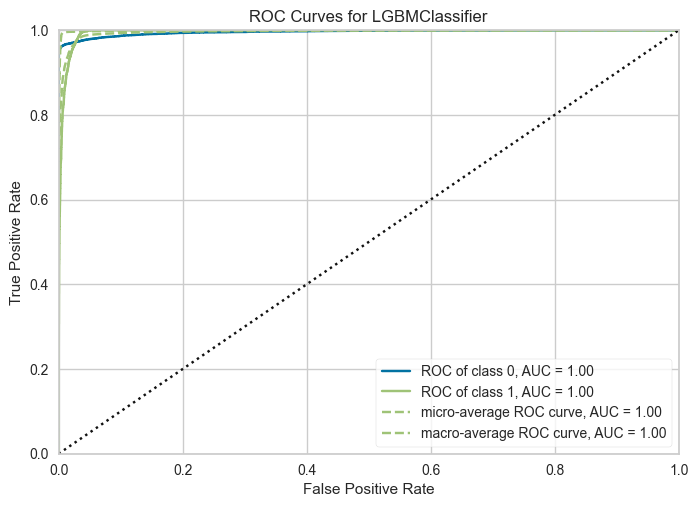

In [43]:
plot_model(best_model, plot='auc')

# Data Preprocessing dengan balacing data target

In [44]:
from pycaret.classification import setup

clf2 = setup(data=df,
             target='status',
             train_size=0.8,
             fix_imbalance=True,
             numeric_imputation='median',
             normalize=True,
             normalize_method='minmax',
             encoding_method='onehot',
             )

,Description,Value
0,Session id,5537
1,Target,status
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(466285, 38)"
5,Transformed data shape,"(755815, 80)"
6,Transformed train set shape,"(662558, 80)"
7,Transformed test set shape,"(93257, 80)"
8,Numeric features,26
9,Date features,4


# Modeling 2

In [45]:
from pycaret.classification import compare_models

# Melatih dan membandingkan beberapa model klasifikasi
best_model2 = compare_models(['lr','dt','rf','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9934,0.9956,0.9934,0.9934,0.9933,0.9661,0.9666,26.0610
rf,Random Forest Classifier,0.9927,0.9941,0.9927,0.9928,0.9926,0.9625,0.9631,139.0490
dt,Decision Tree Classifier,0.9857,0.9676,0.9857,0.9858,0.9858,0.9287,0.9287,32.2130
lr,Logistic Regression,0.9520,0.9828,0.9520,0.9576,0.9539,0.7781,0.7823,55.2690


# Evaluation 2

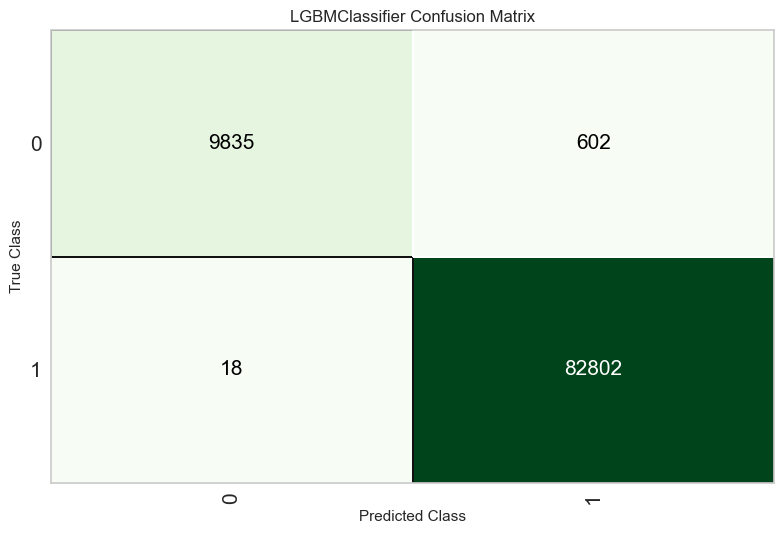

In [46]:
from pycaret.classification import plot_model
# melakukan evaluasi terhadap model yang terbaik
# Plot confusion matrix
plot_model(best_model2, plot='confusion_matrix')

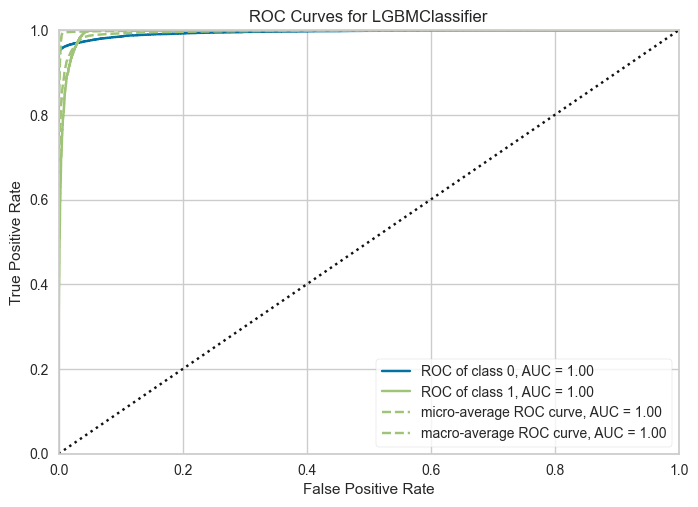

In [47]:
plot_model(best_model2, plot='auc')

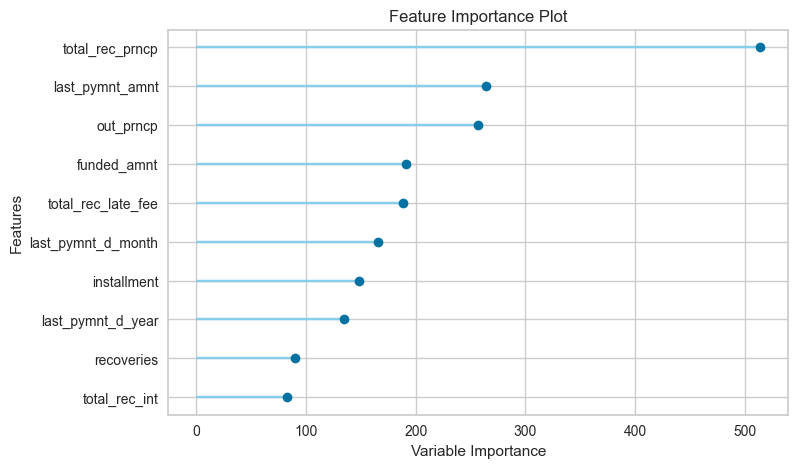

In [48]:
plot_model(best_model2, plot='feature')

# tes prediksi

In [49]:
from pycaret.classification import predict_model  # Import the predict_model function
predict_model(best_model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9934,0.9951,0.9934,0.9934,0.9933,0.9657,0.9662


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,status,prediction_label,prediction_score
459223,12000,12000,12000.000000,36 months,7.62,373.940002,A,4 years,MORTGAGE,113000.0,...,0.0,0.0,2015-05-01,7412.080078,2016-01-01,276636.0,31400.0,good,good,0.9997
6549,4800,4800,4800.000000,36 months,15.96,168.660004,C,8 years,RENT,50000.0,...,0.0,0.0,2014-02-01,599.489990,2015-02-01,81539.0,22800.0,good,good,0.9977
319236,4100,4100,4100.000000,36 months,13.35,138.839996,C,10+ years,MORTGAGE,68000.0,...,0.0,0.0,2015-12-01,138.839996,2016-01-01,107840.0,4700.0,good,good,0.9676
298762,35000,35000,35000.000000,36 months,16.99,1247.680054,D,10+ years,MORTGAGE,176000.0,...,0.0,0.0,2016-01-01,1247.680054,2016-01-01,275276.0,12200.0,good,good,0.9926
29622,16000,16000,15929.786133,60 months,14.96,380.309998,D,< 1 year,MORTGAGE,136000.0,...,0.0,0.0,2015-06-01,405.970001,2015-07-01,81539.0,22800.0,good,good,0.9958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451981,4500,4500,4500.000000,36 months,12.85,151.300003,B,< 1 year,RENT,41496.0,...,0.0,0.0,2015-10-01,2386.489990,2015-10-01,28711.0,5300.0,good,good,0.9995
59917,7200,7200,7200.000000,36 months,15.10,249.949997,C,6 years,RENT,45760.0,...,0.0,0.0,2015-06-01,4066.459961,2016-01-01,29364.0,9700.0,good,good,0.9989
295964,20000,20000,20000.000000,36 months,10.15,646.760010,B,10+ years,MORTGAGE,87000.0,...,0.0,0.0,2016-01-01,646.760010,2016-01-01,250429.0,37900.0,good,good,0.9983
214183,6000,6000,6000.000000,36 months,12.12,199.630005,B,10+ years,MORTGAGE,73000.0,...,0.0,0.0,2014-08-01,2093.360107,2015-12-01,81539.0,22800.0,good,good,0.9991


In [50]:
from pycaret.classification import save_model
save_model(best_model2, 'LGBM')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('date_feature_extractor',
                  TransformerWrapper(exclude=None,
                                     include=['issue_d', 'earliest_cr_line',
                                              'last_pymnt_d',
                                              'last_credit_pull_d'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 le

In [57]:
predictions = predict_model(best_model2)

# Filter hasil prediksi berdasarkan label 'bad'
predictions_bad = predictions[predictions['status'] == 'bad']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9934,0.9951,0.9934,0.9934,0.9933,0.9657,0.9662


In [56]:
first_row = predictions_bad.iloc[0]
print(first_row)


loan_amnt                                30000
funded_amnt                              30000
funded_amnt_inv                        30000.0
term                                 60 months
int_rate                                 12.12
installment                         669.159973
grade                                        B
emp_length                           10+ years
home_ownership                        MORTGAGE
annual_inc                            155000.0
verification_status                   Verified
issue_d                    2012-10-01 00:00:00
purpose                     debt_consolidation
dti                                       3.01
delinq_2yrs                                0.0
earliest_cr_line           1991-07-01 00:00:00
inq_last_6mths                             2.0
open_acc                                   9.0
pub_rec                                    0.0
revol_bal                                16574
revol_util                           31.799999
total_acc    

In [60]:
predictions = predict_model(best_model2)

# Filter hasil prediksi berdasarkan label 'bad'
predictions_good = predictions[predictions['status'] == 'good']


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9934,0.9951,0.9934,0.9934,0.9933,0.9657,0.9662


In [62]:
first_row = predictions_good.iloc[0]
first_row


loan_amnt                                12000
funded_amnt                              12000
funded_amnt_inv                        12000.0
term                                 36 months
int_rate                                  7.62
installment                         373.940002
grade                                        A
emp_length                             4 years
home_ownership                        MORTGAGE
annual_inc                            113000.0
verification_status               Not Verified
issue_d                    2014-01-01 00:00:00
purpose                     debt_consolidation
dti                                  17.620001
delinq_2yrs                                0.0
earliest_cr_line           1986-11-01 00:00:00
inq_last_6mths                             0.0
open_acc                                  15.0
pub_rec                                    0.0
revol_bal                                15868
revol_util                                50.5
total_acc    